In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../src')
import core as c

#### Loading a file

In [2]:
file = 'E0_seasons_5_to_23'
seasons = pd.read_csv(f'../data/processed/{file}.csv')
seasons = c.data_cleaner(seasons)
seasons.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,A_gd_5,H_eff_5,A_eff_5,HST_avg_5,AST_avg_5,target,H_status,A_status,H_H2H,A_H2H
0,E0,13/08/05,Aston Villa,Bolton,2,2,D,2,2,D,...,NaN,NaN,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN
1,E0,13/08/05,Everton,Man United,0,2,A,0,1,A,...,NaN,NaN,NaN,0.0,0.0,2,NaN,NaN,NaN,NaN
2,E0,13/08/05,Fulham,Birmingham,0,0,D,0,0,D,...,NaN,NaN,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN
3,E0,13/08/05,Man City,West Brom,0,0,D,0,0,D,...,NaN,NaN,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN
4,E0,13/08/05,Middlesbrough,Liverpool,0,0,D,0,0,D,...,NaN,NaN,NaN,0.0,0.0,1,NaN,NaN,NaN,NaN


#### File shape (number of matches, variables)

In [3]:
seasons.shape

(6840, 31)

### Seasons statistic (Premier Leauge 2005 - 2023)

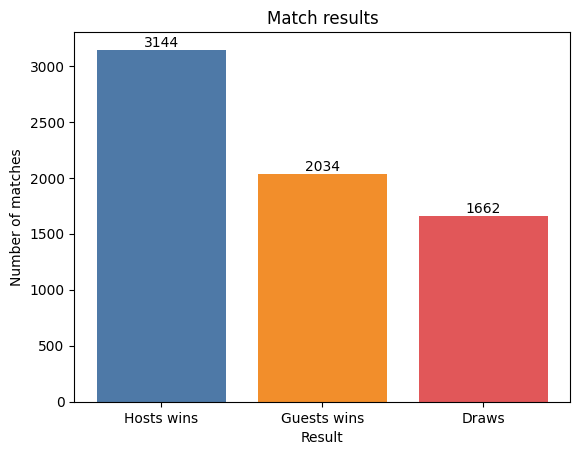

In [4]:
from matplotlib import pyplot as plt

home_wins, away_wins, draws = c.count_results(seasons)

labels = ['Hosts wins', 'Guests wins', 'Draws']
results = [home_wins, away_wins, draws]

for i in range(len(labels)):
    plt.text(i, results[i] + 0.1, str(results[i]), ha='center', va='bottom')

plt.bar(labels, results, color=['#4e79a7', '#f28e2b', '#e15759'])
plt.title('Match results')
plt.xlabel('Result')
plt.ylabel('Number of matches')
plt.show()

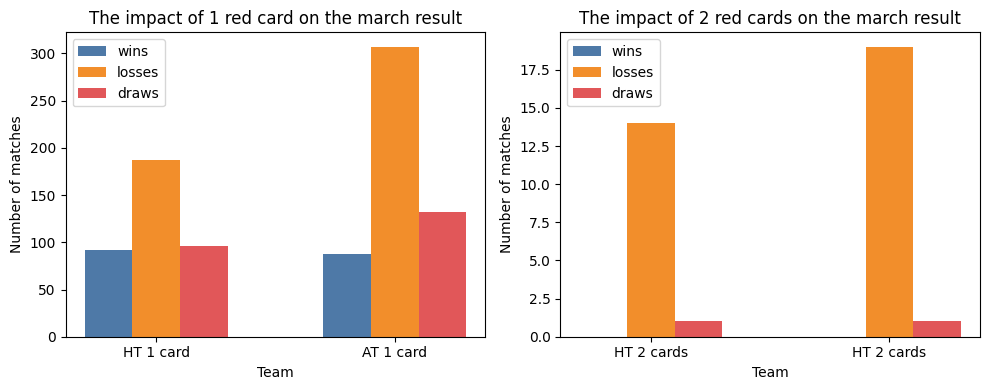

In [5]:
HT_results = c.calc_HT_cards(seasons, card='R', N=3)
AT_results = c.calc_AT_cards(seasons, card='R', N=3)

categories_one = ['HT 1 card', 'AT 1 card']
categories_two = ['HT 2 cards', 'HT 2 cards']

wins_1_card = [HT_results[1]['wins'], AT_results[1]['wins']]
losses_1_card = [HT_results[1]['losses'], AT_results[1]['losses']]
draws_1_card = [HT_results[1]['draws'], AT_results[1]['draws']]

wins_2_card = [HT_results[2]['wins'], AT_results[2]['wins']]
losses_2_card = [HT_results[2]['losses'], AT_results[2]['losses']]
draws_2_card = [HT_results[2]['draws'], AT_results[2]['draws']]

# Parameters
bar_width = 0.2
index = np.arange(len(categories_one))
colors = ['#4e79a7', '#f28e2b', '#e15759']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

bar1 = ax1.bar(index - bar_width, wins_1_card, bar_width, label='wins', color=colors[0])
bar2 = ax1.bar(index, losses_1_card, bar_width, label='losses', color=colors[1])
bar3 = ax1.bar(index + bar_width, draws_1_card, bar_width, label='draws', color=colors[2])
ax1.set_xlabel('Team')
ax1.set_ylabel('Number of matches')
ax1.set_title('The impact of 1 red card on the march result')
ax1.set_xticks(index)
ax1.set_xticklabels(categories_one)
ax1.legend()

bar1 = ax2.bar(index - bar_width, wins_2_card, bar_width, label='wins', color=colors[0])
bar2 = ax2.bar(index, losses_2_card, bar_width, label='losses', color=colors[1])
bar3 = ax2.bar(index + bar_width, draws_2_card, bar_width, label='draws', color=colors[2])
ax2.set_xlabel('Team')
ax2.set_ylabel('Number of matches')
ax2.set_title('The impact of 2 red cards on the march result')
ax2.set_xticks(index)
ax2.set_xticklabels(categories_two)
ax2.legend()

plt.tight_layout()
plt.show()

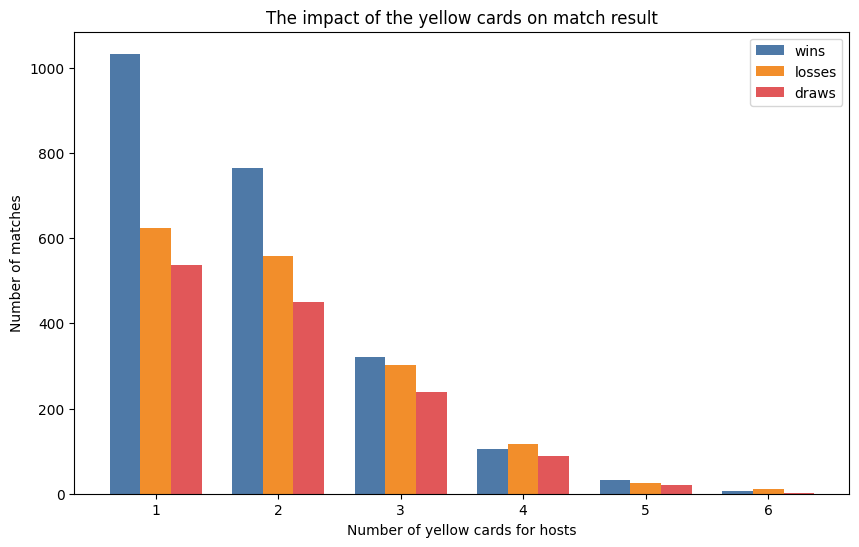

In [6]:
data = c.calc_HT_cards(seasons, card='Y', N=7)

categories = list(data.keys())
wins = [data[cat]['wins'] for cat in categories]
losses = [data[cat]['losses'] for cat in categories]
draws = [data[cat]['draws'] for cat in categories]

# Parameters
num_categories = len(categories)
bar_width = 0.25
index = np.arange(num_categories)
colors = ['#4e79a7', '#f28e2b', '#e15759']

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index - bar_width, wins, bar_width, label='wins', color=colors[0])
bar2 = ax.bar(index, losses, bar_width, label='losses', color=colors[1])
bar3 = ax.bar(index + bar_width, draws, bar_width, label='draws', color=colors[2])

ax.set_xlabel('Number of yellow cards for hosts')
ax.set_ylabel('Number of matches')
ax.set_title('The impact of the yellow cards on match result')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

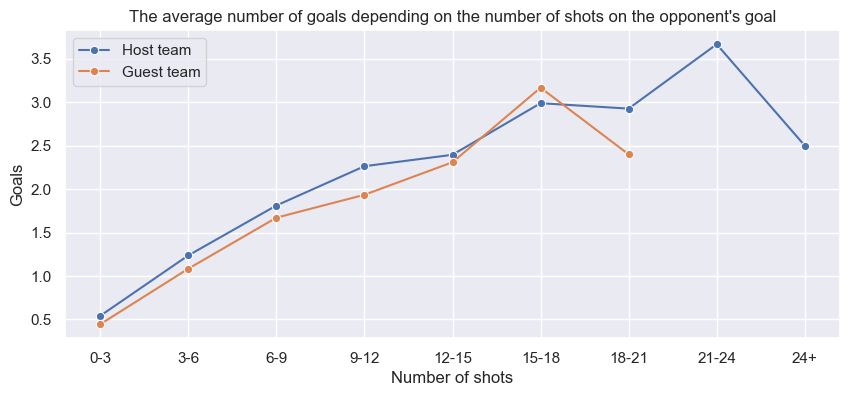

In [7]:
import seaborn as sns

bins = [0, 3, 6, 9, 12, 15, 18, 21, 24, np.inf]
labels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24', '24+']

seasons['HST_Group'] = pd.cut(seasons['HST'], bins=bins, labels=labels, right=False)
seasons['AST_Group'] = pd.cut(seasons['AST'], bins=bins, labels=labels, right=False)

average_goals_HT = seasons.groupby('HST_Group')['FTHG'].mean()
average_goals_AT = seasons.groupby('AST_Group')['FTAG'].mean()

df_plot = pd.DataFrame({
    'HST_Group': average_goals_HT.index,
    'Average Goals (Home Team)': average_goals_HT.values,
    'AST_Group': average_goals_AT.index,
    'Average Goals (Away Team)': average_goals_AT.values,
})

sns.set(style="darkgrid")
plt.figure(figsize=(10, 4))

sns.lineplot(data=df_plot, x='HST_Group', y='Average Goals (Home Team)', marker='o', label='Host team')
sns.lineplot(data=df_plot, x='AST_Group', y='Average Goals (Away Team)', marker='o', label='Guest team')

plt.title("The average number of goals depending on the number of shots on the opponent's goal")
plt.xlabel('Number of shots')
plt.ylabel('Goals')
plt.legend(loc='upper left')

plt.show()

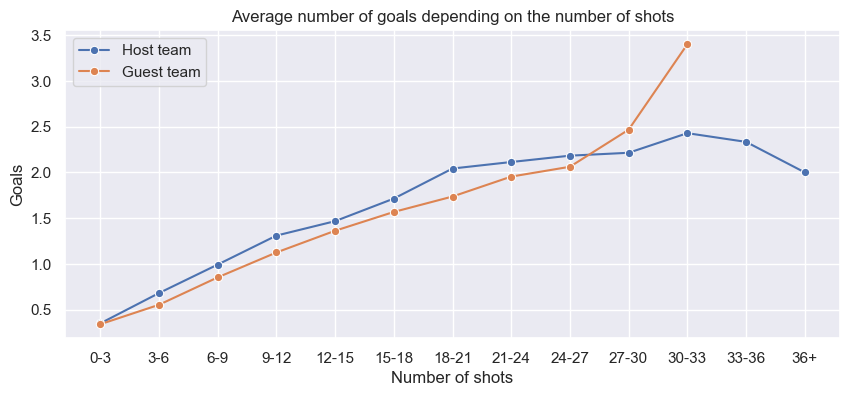

In [8]:
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, np.inf]
labels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24', '24-27', '27-30', '30-33', '33-36', '36+']

seasons['HS_Group'] = pd.cut(seasons['HS'], bins=bins, labels=labels, right=False)
seasons['AS_Group'] = pd.cut(seasons['AS'], bins=bins, labels=labels, right=False)

average_goals_HT = seasons.groupby('HS_Group')['FTHG'].mean()
average_goals_AT = seasons.groupby('AS_Group')['FTAG'].mean()

df_plot = pd.DataFrame({
    'HS_Group': average_goals_HT.index,
    'Average Goals (Home Team)': average_goals_HT.values,
    'AS_Group': average_goals_AT.index,
    'Average Goals (Away Team)': average_goals_AT.values,
})

sns.set(style="darkgrid")
plt.figure(figsize=(10, 4))

sns.lineplot(data=df_plot, x='HS_Group', y='Average Goals (Home Team)', marker='o', label='Host team')
sns.lineplot(data=df_plot, x='AS_Group', y='Average Goals (Away Team)', marker='o', label='Guest team')

plt.title('Average number of goals depending on the number of shots')
plt.xlabel('Number of shots')
plt.ylabel('Goals')
plt.legend(loc='upper left')

plt.show()

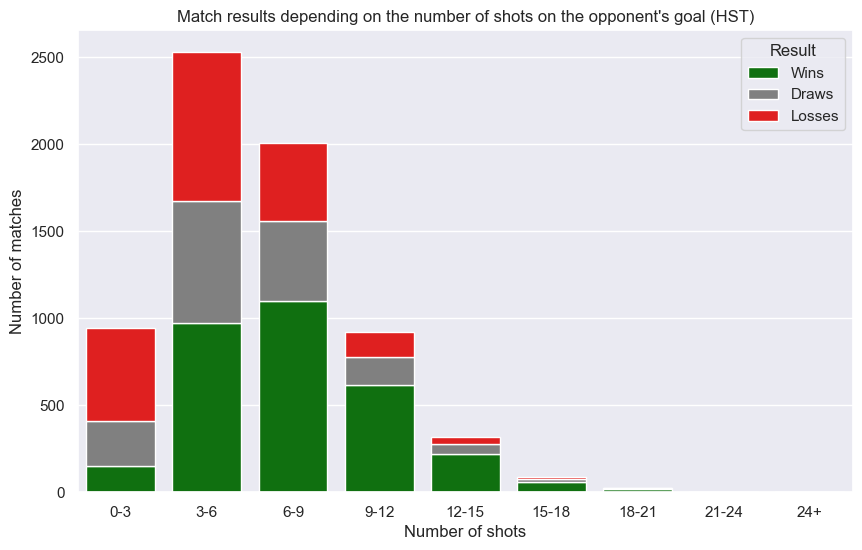

In [9]:
draw_counts = seasons[seasons['target'] == 1].groupby('HST_Group')['target'].count()
win_counts = seasons[seasons['target'] == 0].groupby('HST_Group')['target'].count()
loss_counts = seasons[seasons['target'] == 2].groupby('HST_Group')['target'].count()

df_results = pd.DataFrame({
    'HST_Group': win_counts.index,
    'Wins': win_counts.values,
    'Draws': draw_counts.values,
    'Losses': loss_counts.values,
})

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(data=df_results, x='HST_Group', y='Wins', color='green', label='Wins')
sns.barplot(data=df_results, x='HST_Group', y='Draws', bottom=df_results['Wins'], color='gray', label='Draws')
sns.barplot(data=df_results, x='HST_Group', y='Losses', bottom=df_results['Wins'] + df_results['Draws'], color='red', label='Losses')

plt.title("Match results depending on the number of shots on the opponent's goal (HST)")
plt.xlabel('Number of shots')
plt.ylabel('Number of matches')
plt.legend(title='Result', loc='upper right')

plt.show()

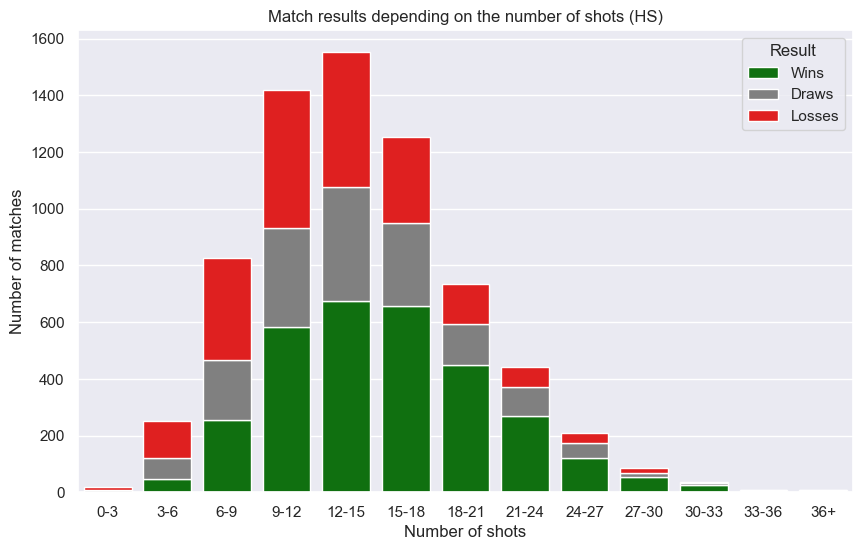

In [10]:
draw_counts = seasons[seasons['target'] == 1].groupby('HS_Group')['target'].count()
win_counts = seasons[seasons['target'] == 0].groupby('HS_Group')['target'].count()
loss_counts = seasons[seasons['target'] == 2].groupby('HS_Group')['target'].count()

df_results = pd.DataFrame({
    'HS_Group': win_counts.index,
    'Wins': win_counts.values,
    'Draws': draw_counts.values,
    'Losses': loss_counts.values,
})

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(data=df_results, x='HS_Group', y='Wins', color='green', label='Wins')
sns.barplot(data=df_results, x='HS_Group', y='Draws', bottom=df_results['Wins'], color='gray', label='Draws')
sns.barplot(data=df_results, x='HS_Group', y='Losses', bottom=df_results['Wins'] + df_results['Draws'], color='red', label='Losses')

plt.title('Match results depending on the number of shots (HS)')
plt.xlabel('Number of shots')
plt.ylabel('Number of matches')
plt.legend(title='Result', loc='upper right')

plt.show()

### League (La Liga 2022/23) statistics

In [11]:
# Premier_league - E0, La_liga - SP1, Ligue_1 - F1, Serie_A - I1
LEAGUE_NAME, LEAGUE_CODE = 'La_liga', 'SP1'
SEASON_YEAR_START = 22

In [12]:
def find_season_name(season_start_year):
    if season_start_year < 9:
        return f"{LEAGUE_CODE}_0{season_start_year}_0{season_start_year + 1}"
    elif season_start_year == 9:
        return f"{LEAGUE_CODE}_0{season_start_year}_{season_start_year + 1}"
    else:
        return f"{LEAGUE_CODE}_{season_start_year}_{season_start_year+ 1}"

season = pd.read_csv(f"../data/raw/{LEAGUE_NAME}/{find_season_name(SEASON_YEAR_START)}.csv")
last_season = pd.read_csv(f"../data/raw/{LEAGUE_NAME}/{find_season_name(SEASON_YEAR_START - 1)}.csv")

selected_columns = [
'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 
'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'
]

season = season[selected_columns]
last_season = last_season[selected_columns]

season.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,SP1,12/08/2022,Osasuna,Sevilla,2,1,H,1,1,D,...,5,3,16,9,5,2,5,3,0,0
1,SP1,13/08/2022,Celta,Espanol,2,2,D,1,0,H,...,3,2,17,15,3,3,5,2,0,0
2,SP1,13/08/2022,Valladolid,Villarreal,0,3,A,0,0,D,...,6,4,6,10,4,5,1,0,0,0
3,SP1,13/08/2022,Barcelona,Vallecano,0,0,D,0,0,D,...,6,2,16,14,8,0,3,6,1,0
4,SP1,14/08/2022,Cadiz,Sociedad,0,1,A,0,1,A,...,2,7,9,20,3,6,4,2,0,0


In [13]:
season.shape

(380, 22)

#### Find all matches played by one team

In [14]:
name = "Barcelona"
team = c.get_all_team_matches(season, name)
team.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
3,SP1,2022-08-13,Barcelona,Vallecano,0,0,D,0,0,D,...,6,2,16,14,8,0,3,6,1,0
17,SP1,2022-08-21,Sociedad,Barcelona,1,4,A,1,1,D,...,5,7,16,9,3,6,2,1,0,0
26,SP1,2022-08-28,Barcelona,Valladolid,4,0,H,2,0,H,...,9,3,9,8,14,4,0,3,0,0
34,SP1,2022-09-03,Sevilla,Barcelona,0,3,A,0,2,A,...,4,7,15,14,4,4,2,4,0,0
43,SP1,2022-09-10,Cadiz,Barcelona,0,4,A,0,0,D,...,0,8,12,13,5,6,1,2,0,0


#### Final table of the season

In [15]:
c.calculate_final_table(season)

,Team,Points
0,Barcelona,88
1,Real Madrid,78
2,Ath Madrid,77
3,Sociedad,71
4,Villarreal,64
5,Betis,60
6,Osasuna,53
7,Ath Bilbao,51
8,Mallorca,50
9,Vallecano,49


#### One team specific statistics

In [16]:
team = 'Betis'
points, avg, position = c.get_team_total_points(season, team), c.get_team_avg_points(season, team), c.get_team_position(season, team)
print(f"{team} got {points}pts which is {avg}pt per game and finished season on {position} position.")

Betis got 60pts which is 1.58pt per game and finished season on 6 position.


#### Newcomer teams statistics

In [17]:
newcomers = pd.DataFrame(c.find_newcomer_teams_statistics(last_season, season)).T.reset_index()
newcomers.columns.values[0] = 'Newcomers'
newcomers

,Newcomers,Points,Avg,Position
0,Girona,49.0,1.29,12.0
1,Almeria,41.0,1.08,17.0
2,Valladolid,40.0,1.05,18.0


#### Is team newcomer?

In [20]:
team = 'Elche'
c.is_team_newcomer(last_season, season, team)

False